### PREDICTING CUSTOMER RETENTION BEHAVIOR IN A TELECOMMUNICATION COMPANY USING MACHINE LEARNING METHODS

This project notebook is basically interested in predicting if a customer would churn or retain the services of the telecommunication company.The approach to prediction is simply through machine learning models and/or algorithms.Also, we would be describing and exploring the dataset using data analytics methods that are native to the python ecosystem.

###### skill set employed

The following skills are in use in the course of working on this project:

- Descriptive Statistics
-Data cleaning and Processing
-Univariate and Multivariate Exploratory Data Analysis
-Feature selection
-Data Encoding
-Addressing class imbalance through SMOTE
-Model creation and evaluation
-Model optimization through hyper-parameter tuning

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency
print('import successful')

import successful


In [2]:
# import dataset
churn = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
# Checking the number of rows and columns in the whole dataset
print('The dataset contains {} rows and {} columns'.format(churn.shape[0], churn.shape[1]))

#We can look at an overview of the dataset(column header row inclusive)
pd.set_option('display.max_columns', None)
churn.head()

The dataset contains 7043 rows and 21 columns


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


we can see that the target column is the churn column and it contains two values, 'Yes' and 'No'

In [4]:
# brief information of the dataset
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# drop customerID column
churn = churn.drop(columns='customerID', axis = 1)

In [6]:
# check for null and unque values
def report(df):
    col = []
    data_type = []
    unique_value = []
    missing_values = []
    
    for i in df.columns:
        col.append(i)
        data_type.append(df[i].dtype)
        unique_value.append(df[i].nunique())
        missing_values.append(df[i].isnull().sum())
    return pd.DataFrame({'Column': col, 'data_type': data_type,'unique_values': unique_value,
                         'missing_values': missing_values})
report(churn)

,Column,data_type,unique_values,missing_values
0,gender,object,2,0
1,SeniorCitizen,int64,2,0
2,Partner,object,2,0
3,Dependents,object,2,0
4,tenure,int64,73,0
5,PhoneService,object,2,0
6,MultipleLines,object,3,0
7,InternetService,object,3,0
8,OnlineSecurity,object,3,0
9,OnlineBackup,object,3,0


It is observed that the 'TotalCharges' column has a data type of object while the 'MonthlyCharges' has a data type of float

In [7]:
print(churn['MonthlyCharges'].values)
print(churn['TotalCharges'].values)
# This shows that the records in the first column is a value unlike the string in the 'Total Charges' column
# Therefore the 'TotalCharges column needs to be converted to a numerical value'

[ 29.85  56.95  53.85 ...  29.6   74.4  105.65]
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [8]:
# Converting the 'TotalCharges' column from an object to float 
#first ignoring all records that has spaces or non numbers by use of errors = coerce 
[pd.to_numeric(churn['TotalCharges'], errors = 'coerce').isnull()]

[0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 7038    False
 7039    False
 7040    False
 7041    False
 7042    False
 Name: TotalCharges, Length: 7043, dtype: bool]

In [9]:
# Viewing the records of Total Charges ignored
print (churn[pd.to_numeric(churn['TotalCharges'], errors = 'coerce').isnull()].shape)
churn[pd.to_numeric(churn['TotalCharges'], errors = 'coerce').isnull()]


(11, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
# Dropping the records of the empty 'Total Charges' 
churn = churn[churn['TotalCharges'] != ' ']
churn.shape

(7032, 20)

In [11]:
# Converting the 'Total Charges Column' to float
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'])

In [12]:
report(churn)
#we can see that the data type of 'Total Charges' column is now float

,Column,data_type,unique_values,missing_values
0,gender,object,2,0
1,SeniorCitizen,int64,2,0
2,Partner,object,2,0
3,Dependents,object,2,0
4,tenure,int64,72,0
5,PhoneService,object,2,0
6,MultipleLines,object,3,0
7,InternetService,object,3,0
8,OnlineSecurity,object,3,0
9,OnlineBackup,object,3,0


In [13]:
# statistical summary of numerical variables
churn.describe().drop('SeniorCitizen',axis = 1)

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


#### Exploratory Data Analysis

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

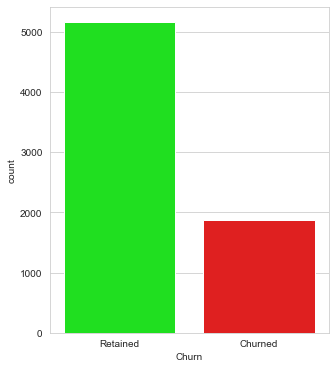

In [14]:
# Analysis of the Target Variable
plt.figure(figsize=(5,6))
p = sns.countplot(x='Churn', data =churn,palette=['#00FF00','#FF0000'])
p.set_xticklabels(['Retained', 'Churned'])
churn['Churn'].value_counts(normalize=True) * 100

we can see that approximately 73% of the customers were retained while 27% churned

<AxesSubplot:xlabel='gender', ylabel='count'>

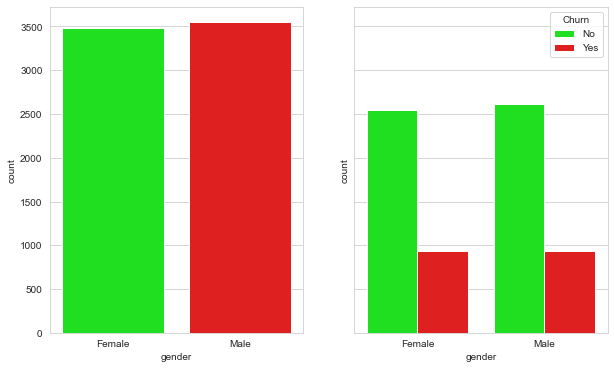

In [15]:
# Analysis of Gender column
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
sns.countplot(data=churn, x='gender',palette=['#00FF00','#FF0000'], ax = axes[0])
sns.countplot(data=churn, x='gender',hue = 'Churn',palette=['#00FF00','#FF0000'],ax = axes[1])

There are roughly the same number of female as male customers and they have similar churn rate. There is also low variance between customers that churned and thos that didn't for both genders

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

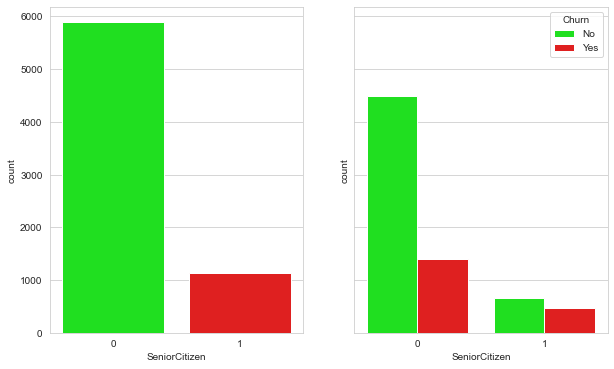

In [16]:
#Analysis of senior citizen column
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
sns.countplot(data=churn, x='SeniorCitizen',palette=['#00FF00','#FF0000'], ax = axes[0])
sns.countplot(data=churn, x='SeniorCitizen',hue = 'Churn',palette=['#00FF00','#FF0000'],ax = axes[1])

There are more young and middle-aged customers than senior citizens. Although the senior citizens are more likely to churn

<AxesSubplot:xlabel='Partner', ylabel='count'>

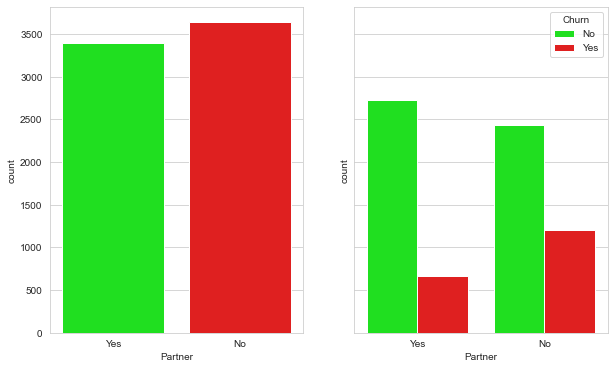

In [17]:
#Analysis of Partner column
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
sns.countplot(data=churn, x='Partner',palette=['#00FF00','#FF0000'], ax = axes[0])
sns.countplot(data=churn, x='Partner',hue = 'Churn',palette=['#00FF00','#FF0000'],ax = axes[1])

There are roughly the same number of single and married customers. Although married customers are less likely to churn

<AxesSubplot:xlabel='Dependents', ylabel='count'>

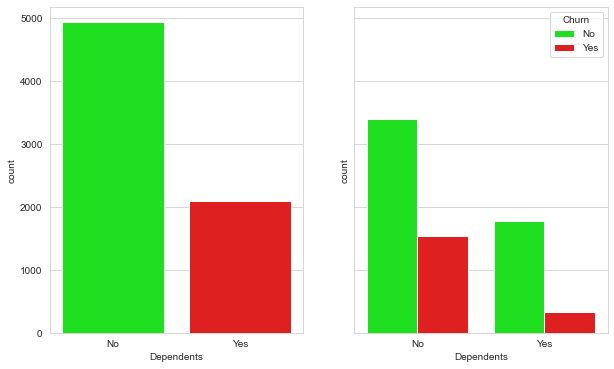

In [18]:
#Analysis of Dependants
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
sns.countplot(data=churn, x='Dependents',palette=['#00FF00','#FF0000'], ax = axes[0])
sns.countplot(data=churn, x='Dependents',hue = 'Churn',palette=['#00FF00','#FF0000'],ax = axes[1])

Most Customers are without dependents. Furthermore, those with dependents are less likely to churn

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

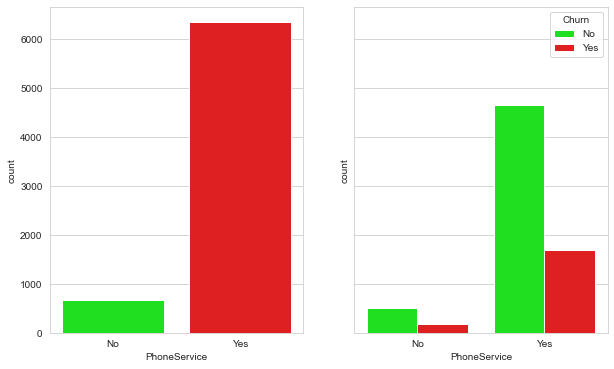

In [19]:
#Analysis of Phone Service
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
sns.countplot(data=churn, x='PhoneService',palette=['#00FF00','#FF0000'], ax = axes[0])
sns.countplot(data=churn, x='PhoneService',hue = 'Churn',palette=['#00FF00','#FF0000'],ax = axes[1])

Most customers use a phone service

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

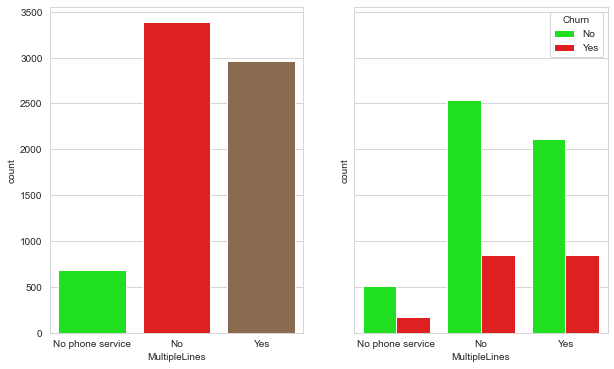

In [20]:
#Analysis of Multiple Lines column
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
sns.countplot(data=churn, x='MultipleLines',palette=['#00FF00','#FF0000','#946B45'], ax = axes[0])
sns.countplot(data=churn, x='MultipleLines',hue = 'Churn',palette=['#00FF00','#FF0000'],ax = axes[1])

<AxesSubplot:xlabel='InternetService', ylabel='count'>

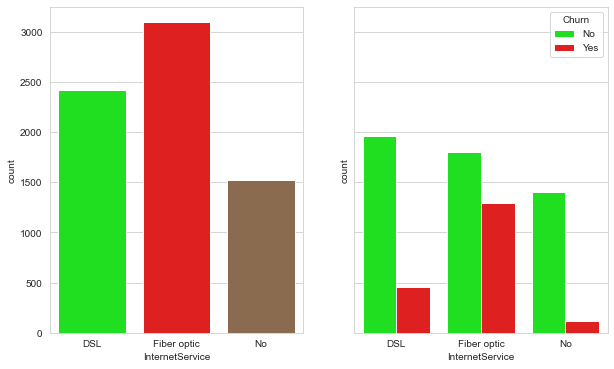

In [21]:
#Analysis of Internet Service column
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
sns.countplot(data=churn, x='InternetService',palette=['#00FF00','#FF0000','#946B45'], ax = axes[0])
sns.countplot(data=churn, x='InternetService',hue = 'Churn',palette=['#00FF00','#FF0000'],ax = axes[1])

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

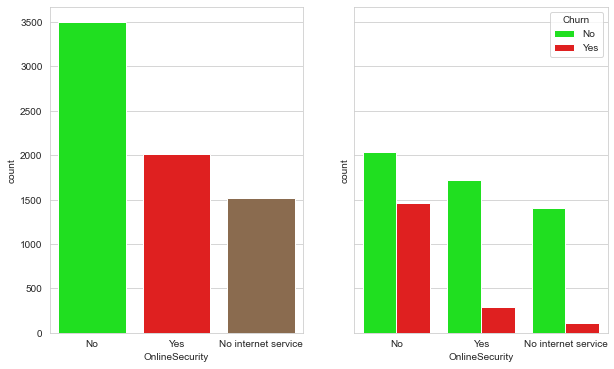

In [22]:
#Analysis of Onlne Security column
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
sns.countplot(data=churn, x='OnlineSecurity',palette=['#00FF00','#FF0000','#946B45'], ax = axes[0])
sns.countplot(data=churn, x='OnlineSecurity',hue = 'Churn',palette=['#00FF00','#FF0000'],ax = axes[1])

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

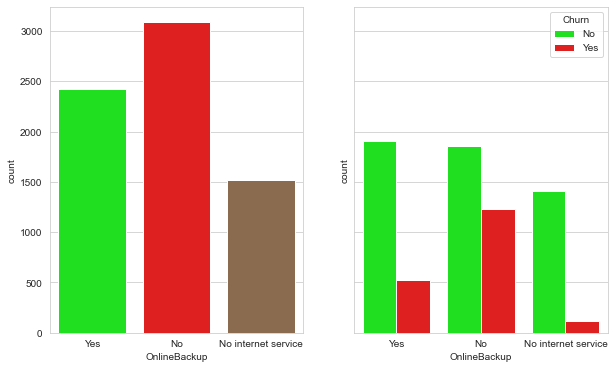

In [23]:
#Analysis of Online Backup column
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
sns.countplot(data=churn, x='OnlineBackup',palette=['#00FF00','#FF0000','#946B45'], ax = axes[0])
sns.countplot(data=churn, x='OnlineBackup',hue = 'Churn',palette=['#00FF00','#FF0000'],ax = axes[1])

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

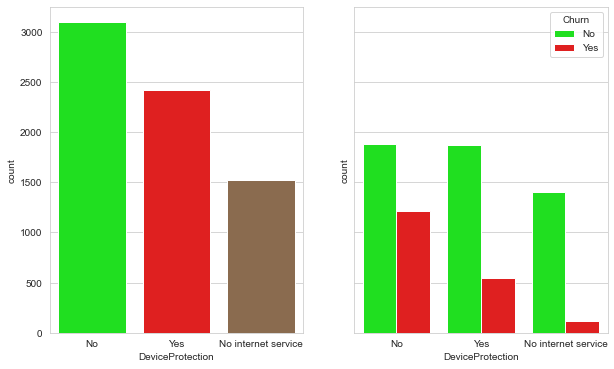

In [24]:
#Analysis of Device Protection column
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
sns.countplot(data=churn, x='DeviceProtection',palette=['#00FF00','#FF0000','#946B45'], ax = axes[0])
sns.countplot(data=churn, x='DeviceProtection',hue = 'Churn',palette=['#00FF00','#FF0000'],ax = axes[1])

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

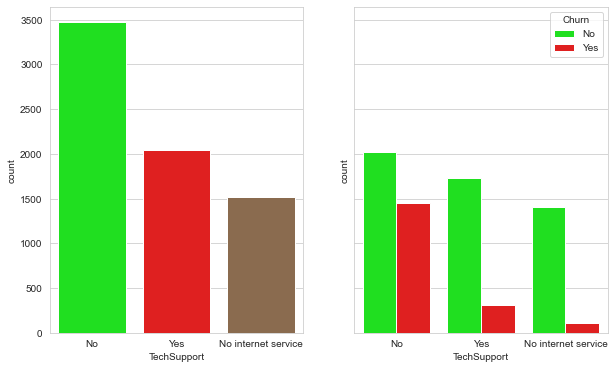

In [25]:
#Analysis of Tech Support column
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
sns.countplot(data=churn, x='TechSupport',palette=['#00FF00','#FF0000','#946B45'], ax = axes[0])
sns.countplot(data=churn, x='TechSupport',hue = 'Churn',palette=['#00FF00','#FF0000'],ax = axes[1])

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

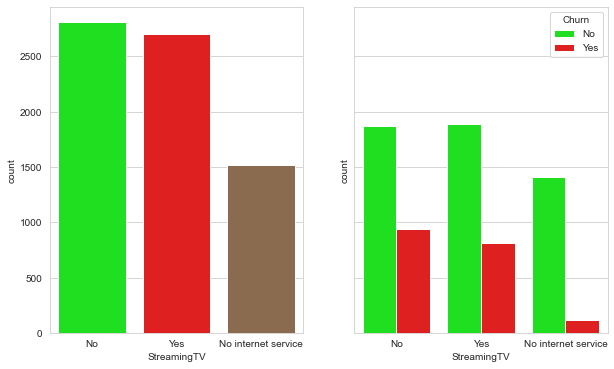

In [26]:
#Anaysis of Streaming TV column
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
sns.countplot(data=churn, x='StreamingTV',palette=['#00FF00','#FF0000','#946B45'], ax = axes[0])
sns.countplot(data=churn, x='StreamingTV',hue = 'Churn',palette=['#00FF00','#FF0000'],ax = axes[1])

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

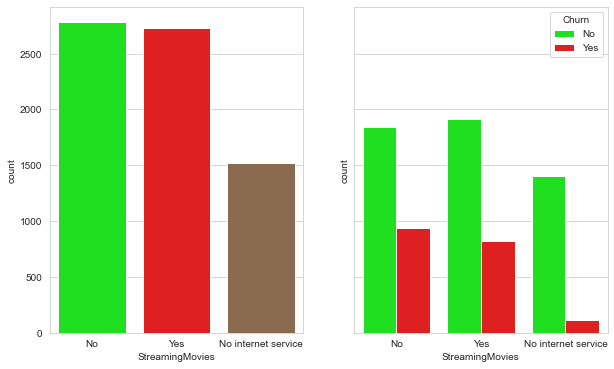

In [27]:
#Analysis of Streaming Movies column
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
sns.countplot(data=churn, x='StreamingMovies',palette=['#00FF00','#FF0000','#946B45'], ax = axes[0])
sns.countplot(data=churn, x='StreamingMovies',hue = 'Churn',palette=['#00FF00','#FF0000'],ax = axes[1])

<AxesSubplot:xlabel='Contract', ylabel='count'>

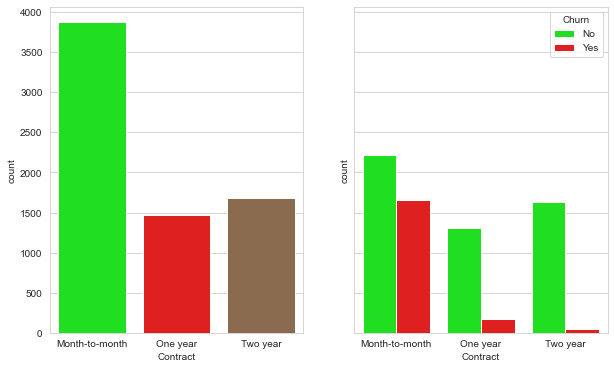

In [28]:
#Analysis of Contract column
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
sns.countplot(data=churn, x='Contract',palette=['#00FF00','#FF0000','#946B45'], ax = axes[0])
sns.countplot(data=churn, x='Contract',hue = 'Churn',palette=['#00FF00','#FF0000'],ax = axes[1])

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

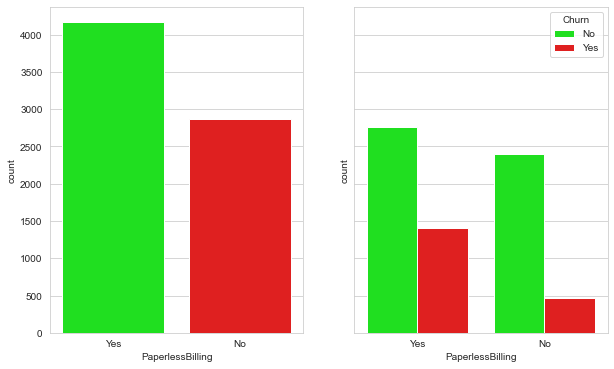

In [29]:
#Analysis of Paperless Billing column
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
sns.countplot(data=churn, x='PaperlessBilling',palette=['#00FF00','#FF0000'], ax = axes[0])
sns.countplot(data=churn, x='PaperlessBilling',hue = 'Churn',palette=['#00FF00','#FF0000'],ax = axes[1])

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

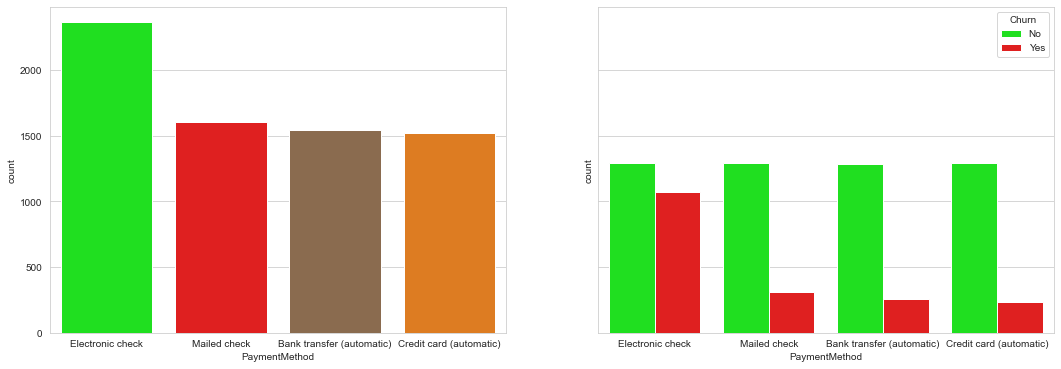

In [30]:
#Analysis of Payment Method column
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
sns.countplot(data=churn, x='PaymentMethod',palette=['#00FF00','#FF0000','#946B45','#fc7b03'], ax = axes[0])
sns.countplot(data=churn, x='PaymentMethod',hue = 'Churn',palette=['#00FF00','#FF0000'],ax = axes[1])

###### Analysis of Numerical columns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tenure'>

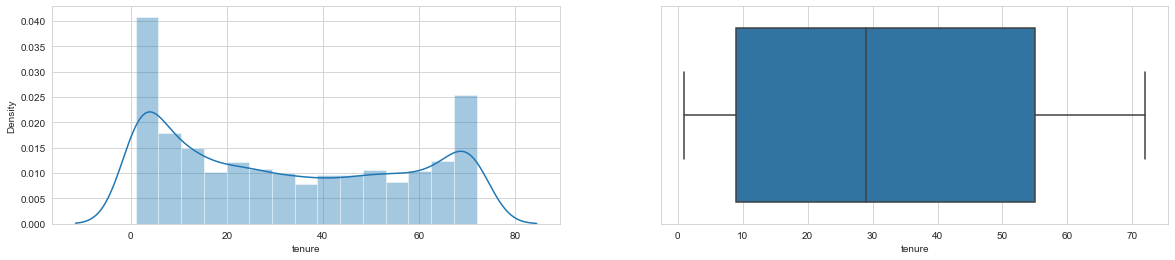

In [31]:
#visualize distribution of tenure column and check for outliers
f = plt.figure(figsize = (20,4))
f.add_subplot(1,2,1)
sns.distplot(churn['tenure'])
f.add_subplot(1,2,2)
sns.boxplot(churn['tenure'])

Text(0.5, 1.0, 'CUSTOMER CHURN BY TENURE')

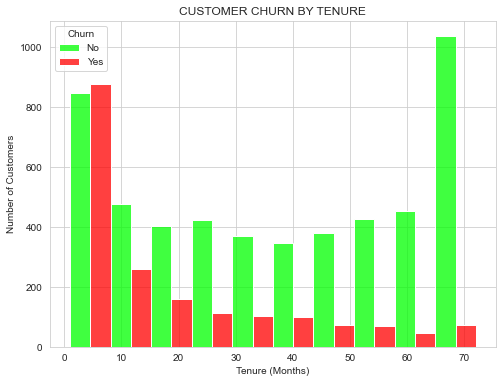

In [32]:
#visualize Tenure column in relation to the target variable
plt.figure(figsize=(8,6))
ax = sns.histplot(x='tenure', data=churn, hue='Churn', bins=10, palette = ['#00FF00','#FF0000'],multiple='dodge')
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (Months)')
ax.set_title('CUSTOMER CHURN BY TENURE')

we can see that customers that have been with the company for more than 4 years are less likely to churn. Also a large number of customers leave in the first month. This is something the company needs to look into.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharges'>

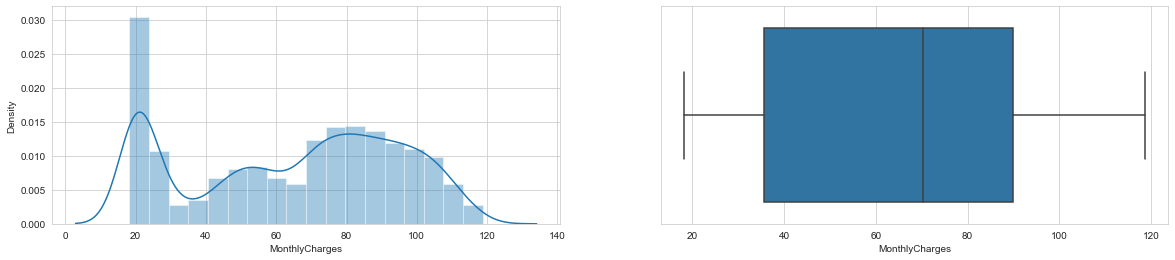

In [33]:
#visualize distribution of monthly charges column and check for outliers
f = plt.figure(figsize = (20,4))
f.add_subplot(1,2,1)
sns.distplot(churn['MonthlyCharges'])
f.add_subplot(1,2,2)
sns.boxplot(churn['MonthlyCharges'])

Text(0.5, 0, 'Monthly Charges')

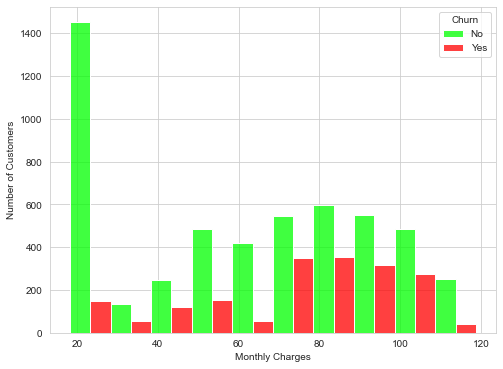

In [34]:
#visualize Monthly charges column in relation to the target variable
plt.figure(figsize=(8,6))
ax = sns.histplot(x='MonthlyCharges', data=churn, hue='Churn', bins=10, palette = ['#00FF00','#FF0000'],multiple='dodge')
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Monthly Charges')

Text(0.5, 1.0, 'CUSTOMER CHURN BY TOTAL CHARGES')

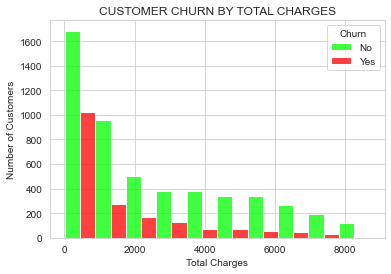

In [36]:
#visualize Total charges column in relation to the target variable
ax = sns.histplot(x='TotalCharges', data=churn, hue='Churn', bins=10, palette = ['#00FF00','#FF0000'],multiple='dodge')
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Total Charges')
ax.set_title('CUSTOMER CHURN BY TOTAL CHARGES')

##### Feature Selection

<AxesSubplot:>

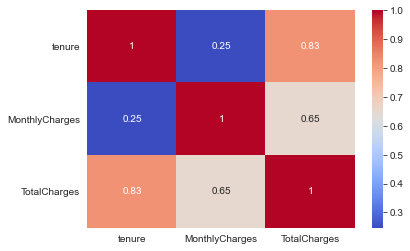

In [37]:
#check for collinearity 
sns.heatmap(churn[['tenure','MonthlyCharges','TotalCharges']].corr(),cmap='coolwarm', annot = True)

The columns 'tenure' and 'Total Charges' are highly correlated (0.83). 'Total Charges' is also correlated to 'Monthly Charges', so 'Total Charges' column would be dropped

In [38]:
churn = churn.drop('TotalCharges', axis=1)
churn.shape

(7032, 19)

In [39]:
# chi square Test for categorical columns
# chi square test is used to test the independence of two events, the value gives a distance between observed and expected frequency.
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
chi2_array, p_array = [], []

for column in categorical:
    crosstab = pd.crosstab(churn[column],churn['Churn'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)
    
    
churn_chi = pd.DataFrame({
    'Variable': categorical,
    'Chi-square': chi2_array,
    'p-value' : p_array
})
churn_chi.sort_values(by='Chi-square', ascending = False)

,Variable,Chi-square,p-value
14,Contract,1179.545829,7.326182e-257
4,tenure,1060.292597,3.471813e-176
8,OnlineSecurity,846.677389,1.400687e-184
11,TechSupport,824.925564,7.407808e-180
7,InternetService,728.695614,5.831199e-159
16,PaymentMethod,645.429900,1.426310e-139
9,OnlineBackup,599.175185,7.776099e-131
10,DeviceProtection,555.880327,1.959389e-121
13,StreamingMovies,374.268432,5.353560e-82
12,StreamingTV,372.456502,1.324641e-81


Gender and Phone service have low chi-square values. if we recall, from EDA there was low variance for customers that churned and those that didnt for both columns. Thereforre both columns would be dropped. 

In [40]:
churn1 = churn
churn1.shape

(7032, 19)

In [41]:
churn = churn.drop(['PhoneService','gender'],axis=1)
churn.shape

(7032, 17)

In [42]:
churn.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


###### Encoding categorical variables

In [43]:
#check column names
churn.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn'],
      dtype='object')

In [44]:
#change target variable to binary
churn['Churn'].replace({'Yes': 1,'No': 0},inplace = True)

In [45]:
churn.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1


In [46]:
#one hot encoding of categorical variables

col = ['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']
churn_encoded = pd.get_dummies(churn, columns = col, drop_first=True)
churn_encoded.head()

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,34,56.95,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2,53.85,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,45,42.30,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,2,70.70,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


###### Dealing with Class imbalance
IF you recall from EDA, the taret variable has a kind of imbalance with one type of class overly outweighing the other. Tp deal with this, we use SMOTE ('Synthetic Minority Oversampling Technique') Algorithm.
Let us take a look at the imbalance once more

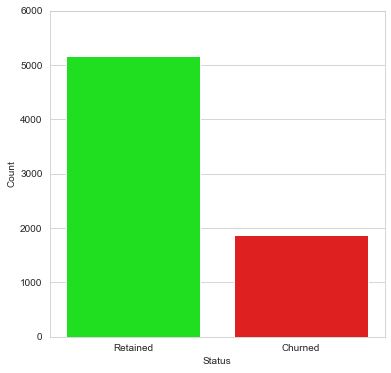

In [47]:
fig, ax = plt.subplots(figsize=(6,6))
sns.countplot(x='Churn', data = churn_encoded, palette=['#00FF00','#FF0000'], ax = ax)
ax.set_xticklabels(['Retained','Churned'])
ax.set_xlabel('Status')
ax.set_ylabel('Count');
ax.set_ylim([0, 6000]);

In [49]:
#using SMOTE to over sample the dataset
!pip install imblearn
from imblearn.over_sampling import SMOTE
x = churn_encoded.drop('Churn', axis = 1)
y = churn_encoded['Churn'] 
x_resampled, y_resampled = SMOTE().fit_resample(x,y)

print(f'The previous shape of the independent variables is {x.shape}')
print(f'The previous shape of the dependent variable is {y.shape}')
print('\n')
print(f'The current shape of the independent variables is {x_resampled.shape}')
print(f'The current shape of the dependent variable is {y_resampled.shape}')


The previous shape of the independent variables is (7032, 27)
The previous shape of the dependent variable is (7032,)


The current shape of the independent variables is (10326, 27)
The current shape of the dependent variable is (10326,)


In [50]:
#split data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.2, random_state = 10)

In [51]:
#scaling the numerical variables
scaler = MinMaxScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

#### Baseline Model
A baseline model is a simple model that will act as a reference to contextualize the results of trained models. we compute the basline model as follows:
- Precision = tp/(tp+fp)
- Recall = tp/(tp+fn)
- f1 = (2* Precision * Recall)/(precision + Recall)

In [52]:
#using unsampled data to obtain the parameters of the baseline model
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [53]:
#when churn value == 0 (when customer is retained)
precision_a = 5163/(5163+1869)
recall_a = 5163/5163
f1_a = (2*precision_a * recall_a)/(precision_a + recall_a)

#when churn value == 1 (when customer is churned)
precision_b = 1869/(1869+5163)
recall_b = 1869/1869

f1_b = (2 * precision_b * recall_b)/(precision_b + recall_b)
#average f1 score
f1 = (f1_a + f1_b)/2
print(f1)

0.6333466408476016


#### Machine Learning models
- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Classifier
- Light Gradient Boosting Machine Classifier
- Artificial Neural Networks

###### Logistic Regression

In [54]:
#import library and make predictions
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train_scale, y_train)

#predict value off scaled x_test set
pred_log = log_reg.predict(x_test_scale)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1004
           1       0.81      0.82      0.82      1062

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



Text(52.0, 0.5, 'Truth')

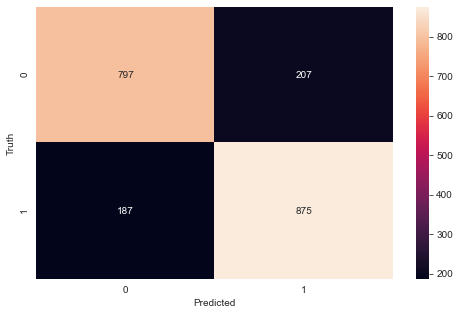

In [55]:
#Import library to evaluate model performance

from sklearn.metrics import classification_report,f1_score,confusion_matrix

print(classification_report(y_test, pred_log))

#plot confusion matrix
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix(y_test, pred_log), annot=True, fmt = '.3g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

AxesSubplot(0.125,0.125;0.775x0.755)


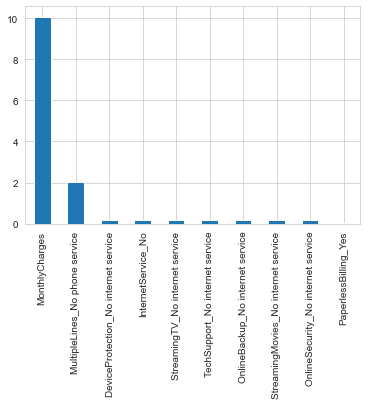

In [88]:
#plotting the weights of the independent variables and their respective contribution to the target variable
weights = pd.Series(log_reg.coef_[0],
                   index=x.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


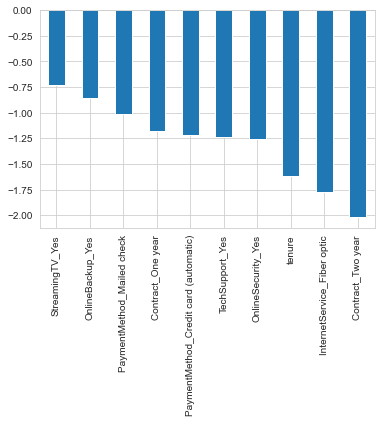

In [90]:
weights = pd.Series(log_reg.coef_[0],
                   index=x.columns.values)
print (weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

##### Decision Trees


In [56]:
#import library and make predictions
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train_scale, y_train)

#predict y values off scaled x_test set
dt_pred = dt.predict(x_test_scale)

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1004
           1       0.80      0.81      0.80      1062

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



Text(52.0, 0.5, 'Truth')

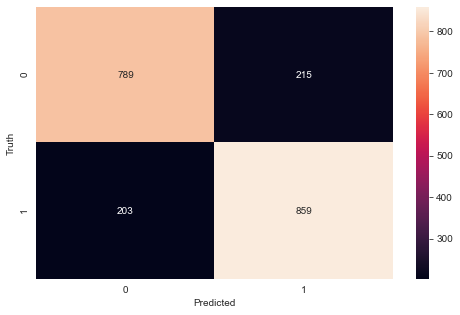

In [57]:
#Evaluate model performance
print(classification_report(y_test, dt_pred))

#plot confusion matrix
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt = '.3g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

###### Random Forest

In [58]:
#import library and make predictions
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train_scale, y_train)

#predict y values off scaled x_test set
rf_pred = rf.predict(x_test_scale)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1004
           1       0.86      0.84      0.85      1062

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



Text(52.0, 0.5, 'Truth')

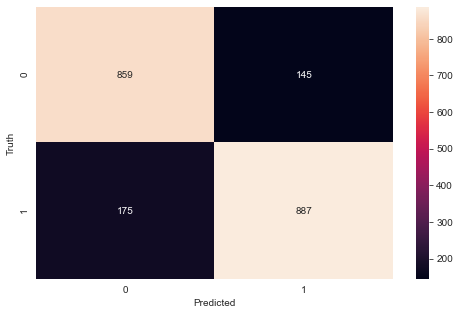

In [59]:
#Evaluate model performance
print(classification_report(y_test, rf_pred))

#plot confusion matrix
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt = '.3g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

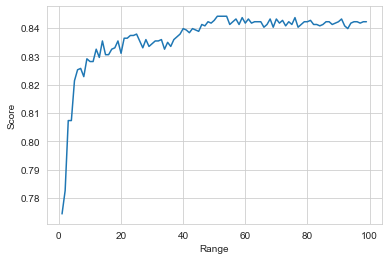

In [60]:
#find the best estimator for Random Forest Tress as against the default
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state= 1)
    rf_loop.fit(x_train_scale,y_train)
    score_array.append(rf_loop.score(x_test_scale,y_test))
    
plt.plot(range(1,100), score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

###### SVC

In [96]:
#import library and make predictions
from sklearn.svm import SVC

svc = SVC(probability = True)
svc.fit(x_train_scale, y_train)

#predict y values off scaled x_test set
svc_pred = svc.predict(x_test_scale)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1004
           1       0.83      0.82      0.82      1062

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



Text(52.0, 0.5, 'Truth')

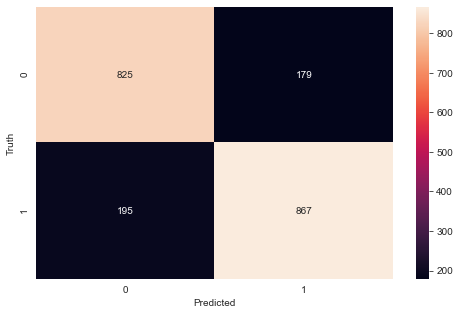

In [62]:
#Evaluate model performance
print(classification_report(y_test, svc_pred))

#plot confusion matrix
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix(y_test, svc_pred), annot=True, fmt = '.3g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

###### LightGBM Classifier

In [63]:
#import library and make predictions
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(x_train_scale, y_train)

lgb_pred = clf.predict(x_test_scale)

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1004
           1       0.84      0.85      0.84      1062

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



Text(52.0, 0.5, 'Truth')

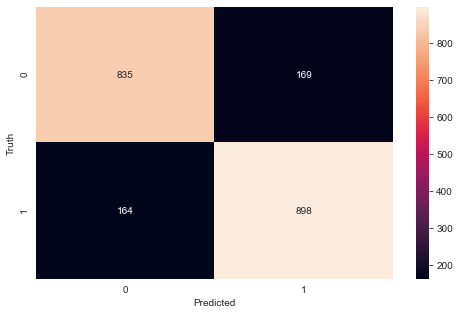

In [64]:
#Evaluate model performance
print(classification_report(y_test, lgb_pred))

#plot confusion matrix
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix(y_test, lgb_pred), annot=True, fmt = '.3g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [65]:
#Hyper parameter Tuning for LightGBM
from sklearn.model_selection import GridSearchCV
lgbm = lgb.LGBMClassifier()
param_grid = {
    'max_depth': [5],
    'num_leaves': [5, 10],
    'learning_rate': [0.001, 0.01],
    'n_estimators': [200],
    'feature_fraction': [0.5],
    'min_child_samples': [5,10],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [0.1, 0.5]
}

lgbmc_clf = GridSearchCV(estimator = lgbm,
                        param_grid=param_grid,
                        scoring='f1',
                        cv=5,
                        verbose=False,
                        n_jobs = -1)

lgbmc_clf.fit(x_train_scale,y_train)

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'feature_fraction': [0.5],
                         'learning_rate': [0.001, 0.01], 'max_depth': [5],
                         'min_child_samples': [5, 10], 'n_estimators': [200],
                         'num_leaves': [5, 10], 'reg_alpha': [0.1, 0.5],
                         'reg_lambda': [0.1, 0.5]},
             scoring='f1', verbose=False)

In [66]:
best_lgbmc_pred = lgbmc_clf.predict(x_test_scale)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1004
           1       0.81      0.84      0.83      1062

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



Text(52.0, 0.5, 'Truth')

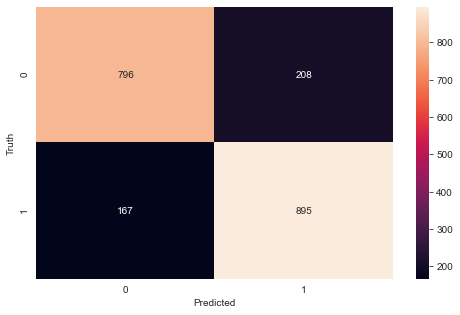

In [67]:
#Evaluate model performance
print(classification_report(y_test, best_lgbmc_pred))

#plot confusion matrix
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix(y_test, best_lgbmc_pred), annot=True, fmt = '.3g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [91]:
#Hyper parameter tuning for Random Forest


rfc = RandomForestClassifier()

param_grid = {'n_estimators':[80,100],
              'criterion':['entropy','gini'],
              'bootstrap': [True, False],
              'max_depth':[5,6],
              'max_features': ['sqrt', 'log2'],
              'min_samples_leaf': [2,3,5],
              'min_samples_split': [2,3,5]
             }

grid = GridSearchCV(rfc, param_grid = param_grid,
                   cv=5, scoring = 'f1',
                    verbose=False,
                    n_jobs = -1,
                   return_train_score = True)
grid.fit(x_train_scale, y_train)

#predict y values off scaled x_test set
rf2_pred = grid.predict(x_test_scale)

In [92]:
grid.best_score_

0.8157840988163843

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1004
           1       0.80      0.85      0.82      1062

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



Text(52.0, 0.5, 'Truth')

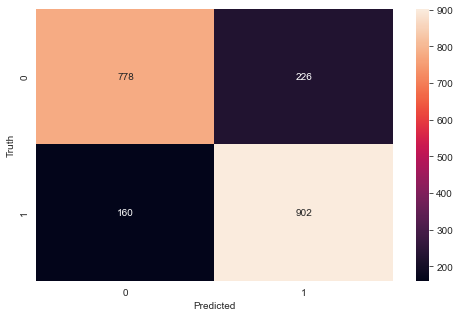

In [93]:
#Evaluate model performance
print(classification_report(y_test, rf2_pred))

#plot confusion matrix
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix(y_test, rf2_pred), annot=True, fmt = '.3g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

It can be observed that hyper parameter tuning did not produce better results

###### Model Evaluation using AUROC and ROC 

In [100]:
#create prediction probability matrices. r_probs is the baseline
r_probs = [0 for _ in range(len(y_test))]
log_reg_probs = log_reg.predict_proba(x_test_scale)
dt_probs = dt.predict_proba(x_test_scale)
rf_probs = rf.predict_proba(x_test_scale)
svc_probs = svc.predict_proba(x_test_scale)
clf_probs = clf.predict_proba(x_test_scale)

In [101]:
#keep probablity of positive outcomes
log_reg_probs = log_reg_probs[:, 1]
dt_probs = dt_probs[:, 1]
rf_probs = rf_probs[:, 1]
svc_probs = svc_probs[:, 1]
clf_probs = clf_probs[:, 1]

In [105]:
#import library
from sklearn.metrics import roc_curve, roc_auc_score

In [107]:
#calculte AUROC
#AUROC is the area under the ROC curve
r_auc = roc_auc_score(y_test, r_probs)
log_reg_auc = roc_auc_score(y_test, log_reg_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
svc_auc = roc_auc_score(y_test, svc_probs)
clf_auc = roc_auc_score(y_test, clf_probs)

In [108]:
#print AUROC scores
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Logistic Regression: AUROC = %.3f' % (log_reg_auc))
print('Decision Tree: AUROC = %.3f' % (dt_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('SVC: AUROC = %.3f' % (svc_auc))
print('LGBM Classifier: AUROC = %.3f' % (clf_auc))

Random (chance) Prediction: AUROC = 0.500
Logistic Regression: AUROC = 0.901
Decision Tree: AUROC = 0.798
Random Forest: AUROC = 0.920
SVC: AUROC = 0.900
LGBM Classifier: AUROC = 0.919


In [109]:
#compute fpr and tpr
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
lgr_fpr, lgr_tpr, _ = roc_curve(y_test, log_reg_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
clf_fpr, clf_tpr, _ = roc_curve(y_test, clf_probs)

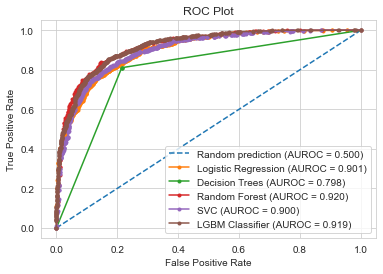

In [110]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(lgr_fpr, lgr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % log_reg_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Trees (AUROC = %0.3f)' % dt_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(svc_fpr, svc_tpr, marker='.', label='SVC (AUROC = %0.3f)' % svc_auc)
plt.plot(clf_fpr, clf_tpr, marker='.', label='LGBM Classifier (AUROC = %0.3f)' % clf_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

###### Artificial Neural Networks

In [75]:
#import necessary libraries and train model
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(27,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(optimizer = 'adam',
             loss='binary_crossentropy',
             metrics = ['accuracy'])
history = model.fit(x_train_scale, y_train, epochs =25, validation_data=(x_test_scale,y_test))



Epoch 1/25
259/259 [==============================] - 2s 3ms/step - loss: 0.5087 - accuracy: 0.7759 - val_loss: 0.4462 - val_accuracy: 0.8064
Epoch 2/25
259/259 [==============================] - 1s 2ms/step - loss: 0.4427 - accuracy: 0.7967 - val_loss: 0.4304 - val_accuracy: 0.8011
Epoch 3/25
259/259 [==============================] - 1s 2ms/step - loss: 0.4292 - accuracy: 0.8028 - val_loss: 0.4221 - val_accuracy: 0.8035
Epoch 4/25
259/259 [==============================] - 1s 3ms/step - loss: 0.4224 - accuracy: 0.8096 - val_loss: 0.4177 - val_accuracy: 0.7991
Epoch 5/25
259/259 [==============================] - 1s 3ms/step - loss: 0.4166 - accuracy: 0.8117 - val_loss: 0.4270 - val_accuracy: 0.8006
Epoch 6/25
259/259 [==============================] - 1s 3ms/step - loss: 0.4133 - accuracy: 0.8102 - val_loss: 0.4186 - val_accuracy: 0.8045
Epoch 7/25
259/259 [==============================] - 1s 3ms/step - loss: 0.4099 - accuracy: 0.8140 - val_loss: 0.4124 - val_accuracy: 0.8049
Epoch 

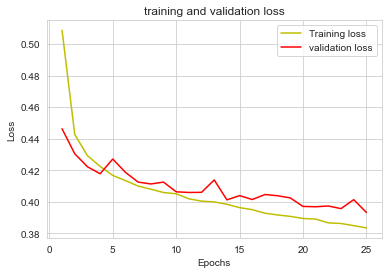

In [76]:
#plot of the Training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label ='validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [77]:
model.evaluate(x_test_scale, y_test)

65/65 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 0.8146


[0.39316055178642273, 0.8146176338195801]

In [78]:
yp = model.predict(x_test_scale)

65/65 [==============================] - 0s 1ms/step


In [79]:
#convert predicted values to binary
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1004
           1       0.82      0.81      0.82      1062

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



Text(52.0, 0.5, 'Truth')

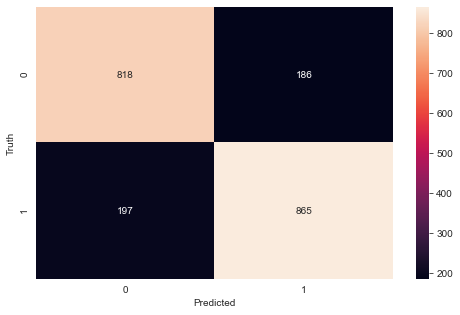

In [80]:
#Evaluate model performance
print(classification_report(y_test, y_pred))

#plot confusion matrix
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt = '.3g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

###### Conclusion

We have been able to build models that performed very well by making sure we adopted best practices. Some vital points were raised in the EDA which could be looked into further by the company. Although all the models performed beter than the baseline model, Random Forest Classifier performed best with an accuracy and f1 score of 84% and 0.84. Quality data in large quantity will always produce better results. The volume available can be increased so as to provide the models with more data to learn and/or train from.